Source: https://product-data-science.datamasked.com/courses/496549/lectures/9194603

### Goal

The goal is to perform funnel analysis for an e-commerce website.

Typically, websites have a clear path to conversion: for instance, you land on the home page, then you search, select a product and buy it. At each of these steps, some users will drop off and leave the site. The sequence of pages that leads to conversion is called ‘funnel’ .

Data Science can have a tremendous impact on funnel optimization.
Funnel analysis allows to understand where/when our users abandon the website. It gives crucial insights on user behavior and on ways to improve the user experience as well as it often allows to discover bugs.

### Challenge Description

You are looking at data from an e-commerce website. The site is very simple and has just 4 pages:



1. The first page is the home page. When you come to the site for the first time, you can only land on the home page as a first page.

2. From the home page, the user can perform a search and land on the search page.

3. From the search page, if the user clicks on a product, she will get to the payment page, where she is asked to provide payment information in order to buy that product.

4. If she does decide to buy, she ends up on the confirmation page


The company CEO isn’t very happy with the company sales and, especially, sales coming from new users. Therefore, she asked you to investigate whether there is something wrong in the conversion funnel or, in general, if you can create hypotheses on how conversion rate could be improved.

Specifically, she is interested in :



1. A full picture of funnel conversion rate for both desktop and mobile


2. Some insights on what the product team should focus on in order to improve conversion rate as well as anything you might discover that could help improve conversion rate.



### Data

In [2]:
import pandas as pd
import numpy as np

home_page = pd.read_csv('data/Funnel_Analysis/home_page_table.csv')
pay_confirm = pd.read_csv('data/Funnel_Analysis/payment_confirmation_table.csv')
pay_page = pd.read_csv('data/Funnel_Analysis/payment_page_table.csv')
search_page = pd.read_csv('data/Funnel_Analysis/search_page_table.csv')
user = pd.read_csv('data/Funnel_Analysis/user_table.csv')

In [3]:
# merge the dataframes into 1
df = user.merge(home_page, on='user_id', how='left')
df = df.merge(search_page, on='user_id', how='left')
df = df.merge(pay_page, on='user_id', how='left')
df = df.merge(pay_confirm, on='user_id', how='left')

# rename cols
cols = ['user_id', 'date', 'device', 'sex', 'visit_HomePage', 'visit_SearchPage', 'visit_PayPage', 'visit_PayConfirmPage']
df.columns = cols

# replace visit as 1, NaN as 0
df['visit_HomePage'].replace('home_page', 1, inplace=True)
df['visit_SearchPage'].replace('search_page', 1, inplace=True)
df['visit_PayPage'].replace('payment_page', 1, inplace=True)
df['visit_PayConfirmPage'].replace('payment_confirmation_page', 1, inplace=True)

df['visit_HomePage'] = df['visit_HomePage'].fillna(0).astype(int)
df['visit_SearchPage'] = df['visit_SearchPage'].fillna(0).astype(int)
df['visit_PayPage'] = df['visit_PayPage'].fillna(0).astype(int)
df['visit_PayConfirmPage'] = df['visit_PayConfirmPage'].fillna(0).astype(int)

df.describe(include='all')

,user_id,date,device,sex,visit_HomePage,visit_SearchPage,visit_PayPage,visit_PayConfirmPage
count,90400.000000,90400,90400,90400,90400.0,90400.000000,90400.000000,90400.000000
unique,NaN,120,2,2,NaN,NaN,NaN,NaN
top,NaN,2015-02-08,Desktop,Male,NaN,NaN,NaN,NaN
freq,NaN,877,60200,45325,NaN,NaN,NaN,NaN
mean,498709.683473,NaN,NaN,NaN,1.0,0.500000,0.066704,0.005000
std,289040.674085,NaN,NaN,NaN,0.0,0.500003,0.249509,0.070534
min,17.000000,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000
25%,247978.750000,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000
50%,498267.000000,NaN,NaN,NaN,1.0,0.500000,0.000000,0.000000
75%,749789.250000,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000


### Question 1

A full picture of funnel conversion rate for both desktop and mobile

In [42]:
grouped = df.groupby('device')[['visit_HomePage', 'visit_SearchPage', 'visit_PayPage', 'visit_PayConfirmPage']].mean()
grouped

,visit_HomePage,visit_SearchPage,visit_PayPage,visit_PayConfirmPage
device,,,,
Desktop,1.0,0.5,0.05,0.002492
Mobile,1.0,0.5,0.10,0.010000


In [43]:
grouped.index

Index(['Desktop', 'Mobile'], dtype='object', name='device')

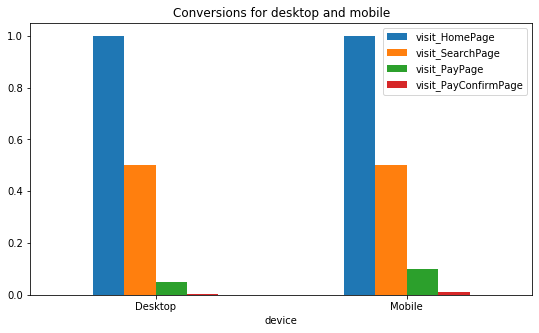

In [44]:
import matplotlib.pyplot as plt

# fig = plt.figure()
# ax = fig.add_subplot(111)

# grouped.visit_HomePage.plot(kind='bar')
# grouped.visit_SearchPage.plot(kind='bar')
ax = grouped.plot(kind='bar', figsize=(9, 5), title='Conversions for desktop and mobile')
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
# for i, idx in enumerate(grouped.index):
#     for col in grouped.columns:
#         y = grouped.iloc[i, :][col]
#         ax.test(i, y, y)

In [46]:
desktop = grouped.reset_index()[grouped.reset_index()['device'] == 'Desktop'].reset_index()
mobile = grouped.reset_index()[grouped.reset_index()['device'] == 'Mobile'].reset_index()

print('Overall conversion rate for the company {:.1%}'.format((desktop['visit_PayConfirmPage'][0] + mobile['visit_PayConfirmPage'][0]) / 2))
print('\n')
print('---- Desktop ----')
print('{:.1%} of users on Home page continue to Search page'.format(desktop['visit_SearchPage'][0]/desktop['visit_HomePage'][0]))
print('{:.1%} of users on Search page continue to Pay page'.format(desktop['visit_PayPage'][0]/desktop['visit_SearchPage'][0]))
print('{:.1%} of users on Pay page continue to Pay Confirmation'.format(desktop['visit_PayConfirmPage'][0]/desktop['visit_PayPage'][0]))
print('Overall conversion for desktop {:.1%}'.format(desktop['visit_PayConfirmPage'][0]/desktop['visit_HomePage'][0]))


print('---- Mobile ----')
print('{:.1%} of users on Home page continue to Search page'.format(mobile['visit_SearchPage'][0]/mobile['visit_HomePage'][0]))
print('{:.1%} of users on Search page continue to Pay page'.format(mobile['visit_PayPage'][0]/mobile['visit_SearchPage'][0]))
print('{:.1%} of users on Pay page continue to Pay Confirmation'.format(mobile['visit_PayConfirmPage'][0]/mobile['visit_PayPage'][0]))
print('Overall conversion for mobile {:.1%}'.format(mobile['visit_PayConfirmPage'][0]/mobile['visit_HomePage'][0]))


Overall conversion rate for the company 0.6%


---- Desktop ----
50.0% of users on Home page continue to Search page
10.0% of users on Search page continue to Pay page
5.0% of users on Pay page continue to Pay Confirmation
Overall conversion for desktop 0.2%
---- Mobile ----
50.0% of users on Home page continue to Search page
20.0% of users on Search page continue to Pay page
10.0% of users on Pay page continue to Pay Confirmation
Overall conversion for mobile 1.0%


From the data result above, we can see mobile device has a better conversion than Desktop device (1.0% vs. 0.2%). 
1. From the stage of search page to pay page, mobile device has double conversion ratio of desktop device (20% vs. 10%), so for Desktop device, check if any bugs on search page that causes the low conversion rate, or improve the search algorithms accuracy on Desktop device.

2. From pay page to pay confirmation, mobile device also has double conversion ratio of desktop device (10% vs. 5%). But both ratios are not very high. So first, check if any bugs on pay page that result in payment failure for customers. Second, probably the company can send out follow-up emails for those customers who were on pay page but didn't checkout, to improve the 

### Question 2

In [47]:
grouped = df.groupby('sex')[['visit_HomePage', 'visit_SearchPage', 'visit_PayPage', 'visit_PayConfirmPage']].mean()
grouped

,visit_HomePage,visit_SearchPage,visit_PayPage,visit_PayConfirmPage
sex,,,,
Female,1.0,0.503073,0.068774,0.005347
Male,1.0,0.496944,0.064644,0.004655


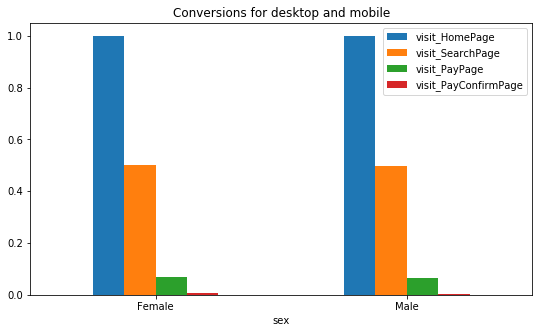

In [48]:
ax = grouped.plot(kind='bar', figsize=(9, 5), title='Conversions for desktop and mobile')
for tick in ax.get_xticklabels():
    tick.set_rotation(0)

Female has a little bit higher conversion rate than male, but not a very big difference.

The overall conversion rate of the company is only 0.6% (1.0% for mobile and 0.2% for desktop device respectively), which is quite low, some thoughts on further investigations to study the customers' behaviour and thus improve the conversion:
1. Check the current system, especially for desktop device, any bugs that affect the user experience
2. Further breakdown 'mobile' and 'desktop' by device(ISO, Android and so on) and by countries (using IP address maybe)
3. Further study the customer profile, like age, countries, sources(referral, SEO, email compaign, etc.), to find target groups for the company, and follow up with them to improve conversion